In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import pdb
import pickle
from scipy import stats
import math
import seaborn as sns
import os
import pylab
from ipywidgets import interact
from IPython.core.display import display, HTML
import winsound

In [2]:
import warnings;
warnings.filterwarnings("ignore");

In [3]:
%load_ext rpy2.ipython

load in the required packages and the R code extension

In [4]:
os.chdir("D:/Worms_Life_Sim/")
import vectorized_RG as RG

### Debugging
pdb.set_trace() debugging mode will be entered when a worm has negative energy
1. "n" ENTER runs the next line in the program
2. "q" ENTER quits/crashes the program
3. "p" (variable) ENTER prints out the variable
4. "c" ENTER continues running the program

[Debugging in Python](https://pythonconquerstheuniverse.wordpress.com/2009/09/10/debugging-in-python/)

### Code Timer
%load_ext line_profiler

%lprun -f run run(1)

In [5]:
exp = 7
vers = 7
run = 2
para = "food_amp"
combination_graph = True

define which experiment to study and the parameter varied

In [6]:
os.chdir("D:/Worms_Life_Sim/experiments/exp_" + str(exp) + "_version_" + str(vers) + "_run_" + str(run) + "/")

set the working directory

In [7]:
time_saved = [int(file.split("_")[-1].split(".")[0]) for file in os.listdir() if file.split("_")[0] == "all"]
time_saved.sort()
print(time_saved)

[1, 250, 500, 1000, 1500, 2000, 5000, 10000, 15000, 20000, 25000, 30000]


discover which time points got saved by looking at the file names

In [8]:
my_data = [RG.open_pickle(i) for i in time_saved]

In [9]:
RG.which_gen(my_data[-1]["array"], my_data[-1]["p_to_i"], my_data[-1]["par"])

This is generation number 182


In [10]:
def worm_map(time=1):
    RG.worm_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"], map_type="dauer")

interact(worm_map, time=(1,len(time_saved)-1));

interactive(children=(IntSlider(value=1, description='time', max=11, min=1), Output()), _dom_classes=('widget-…

In [11]:
def gender_map(time=0):
    RG.gender_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(gender_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

male data is translucent and on top, so covers over female data a bit in those locations

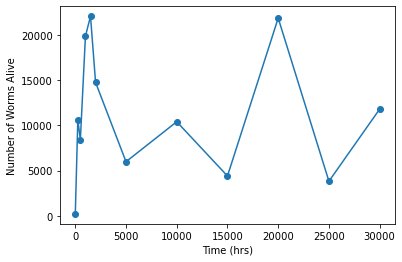

In [12]:
RG.worms_alive(time_saved, my_data)

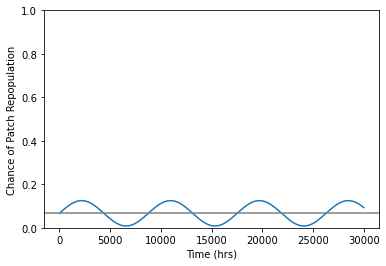

In [13]:
RG.patch_repop(my_data[-1]["par"])

In [14]:
def food_map(time=0):
    RG.food_map(my_data[time]["grid_amt"], my_data[time]["par"], my_data[time]["grid_layer"])

interact(food_map, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

In [15]:
def num_gender(time=0):
    RG.num_gender(my_data[time]["par"], my_data[time]["g_to_i"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_gender, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

In [16]:
def num_stage(time=0):
    RG.num_stage(my_data[time]["i_to_s"], my_data[time]["p_to_i"], my_data[time]["array"])

interact(num_stage, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

chance of dying in each stage
L1 : 0.6669727039054889
L2 : 0.1485422932860023
L2d : 0.2429915052205099
L3 : 0.1582206059606769
dauer : 0.9797998333218646
L4 : 0.2067454187626944
adult : 0.8608149743701603


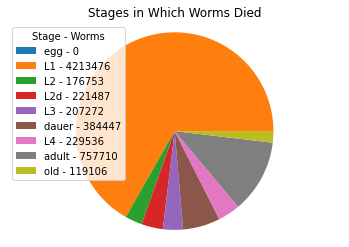

In [17]:
display(HTML("<style>div.output_scroll { height: 30em; }</style>"))
RG.frac_dead(my_data[-1]["i_to_s"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

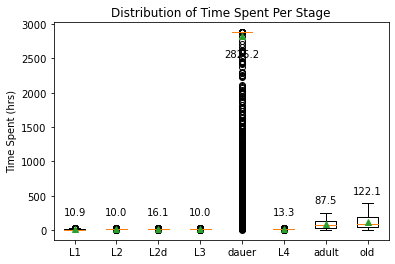

In [18]:
display(HTML("<style>div.output_scroll { height: 35em; }</style>"))
L2d_avg = RG.stage_time(my_data[-1]["stage_list"], my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

- the average time spent in each stage (green triangle) is printed above each box plot
- there is also the option to remove the dauer box by setting exclude_dauer = False

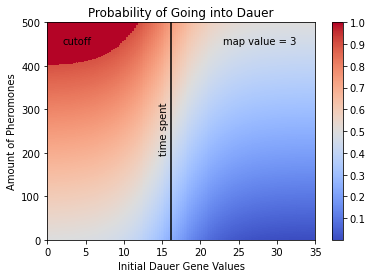

In [19]:
RG.prob_dauer(my_data[-1]["par"], L2d_avg)

In [20]:
def stats_d(time=0):
    RG.stats_d(my_data[time]["p_to_i"], my_data[time]["array"], my_data[time]["par"], L2d_avg)

interact(stats_d, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

In [21]:
def stats_s(time=0):
    RG.stats_s(my_data[time]["p_to_i"], my_data[time]["array"])

interact(stats_s, time=(0,len(time_saved)-1));

interactive(children=(IntSlider(value=0, description='time', max=11), Output()), _dom_classes=('widget-interac…

x axis limits include travel direction genes from 0.25 - 0.75

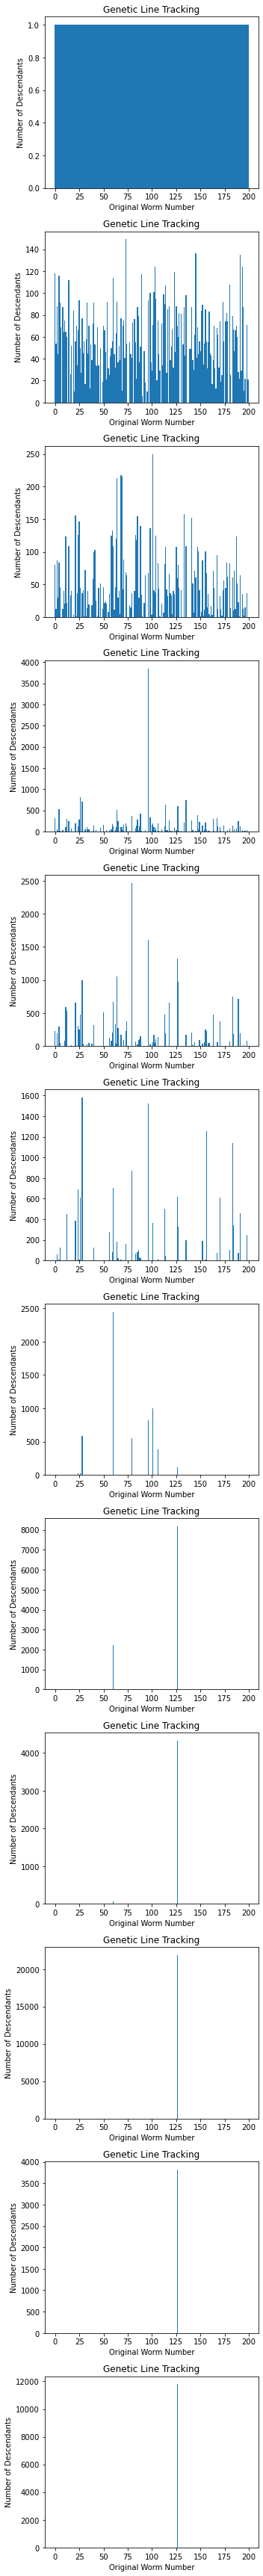

In [22]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.stats_g(my_data[i]["par"], my_data[i]["p_to_i"], my_data[i]["array"])
plt.tight_layout()

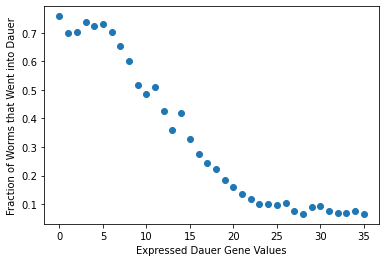

In [23]:
RG.frac_dauer(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

fraction of worms that went into dauer = the number of worms that went into dauer / the total number of worms that went into either L3 or dauer

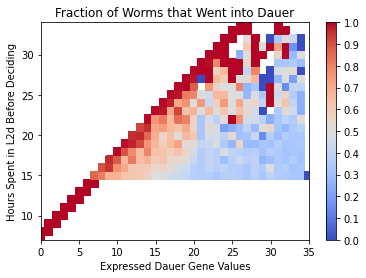

In [24]:
RG.frac_dauer_map(my_data[-1]["p_to_i"], my_data[-1]["array"], my_data[-1]["par"])

- only includes worms that made it through L2d and not ones that went through L2
- white spaces indicate there are no worms with that combination

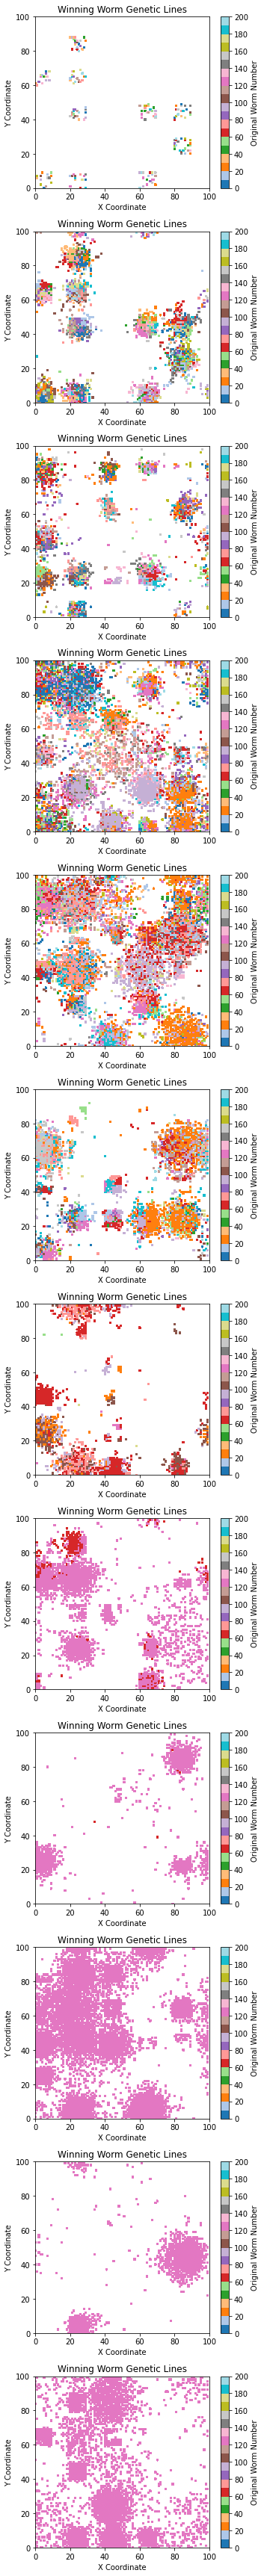

In [25]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.genetic_line_map(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

In [26]:
def dauer_line(time=1):
    RG.dauer_line(my_data[time]["array"], my_data[time]["p_to_i"], my_data[time]["s_to_i"], my_data[time]["par"])

interact(dauer_line, time=(1,len(time_saved)-1));

interactive(children=(IntSlider(value=1, description='time', max=11, min=1), Output()), _dom_classes=('widget-…

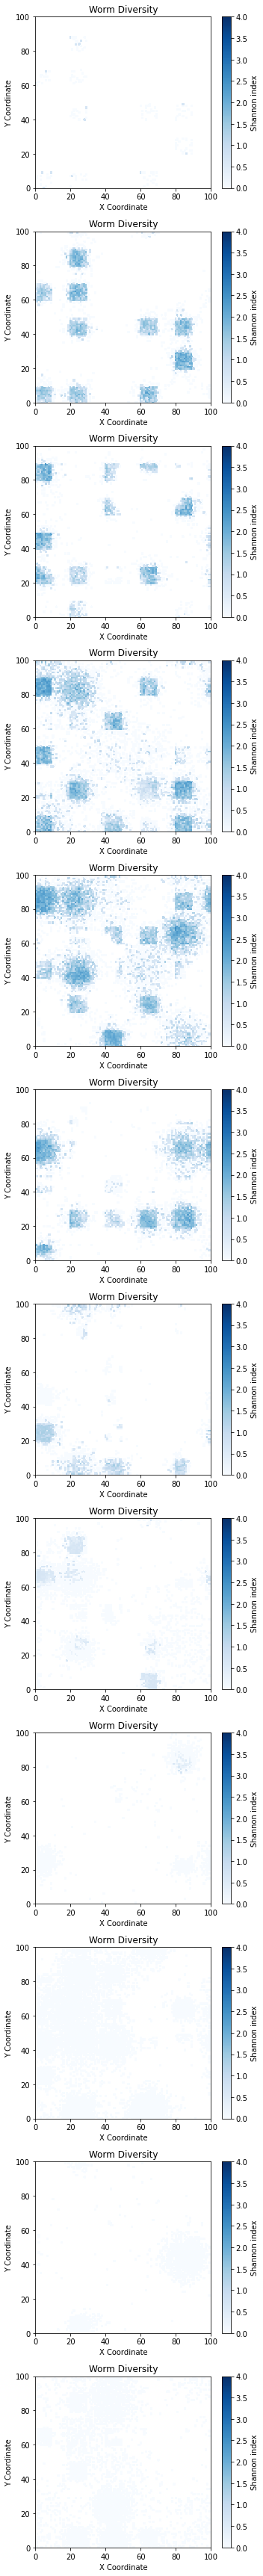

In [27]:
f = plt.figure(figsize=(5,len(time_saved)*4))
for i in range(len(time_saved)):
    f.add_subplot(len(time_saved),1,i+1)
    RG.diversity(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])
plt.tight_layout()

the limit of Shannon index values is from 0 to 4

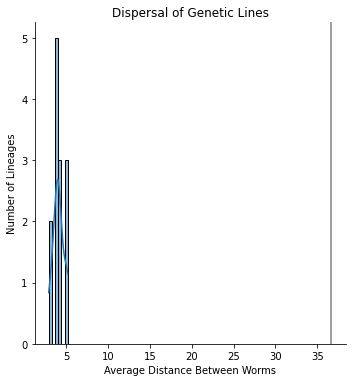

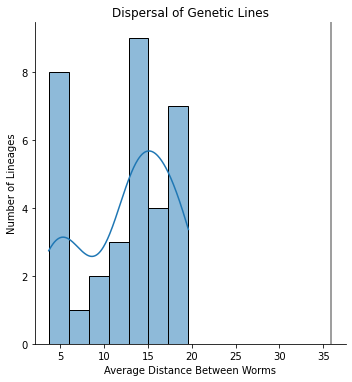

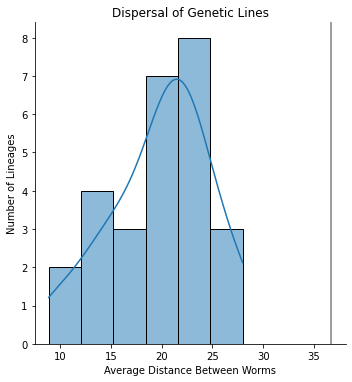

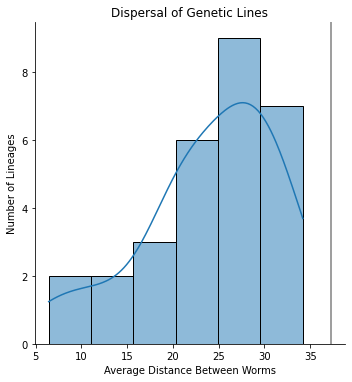

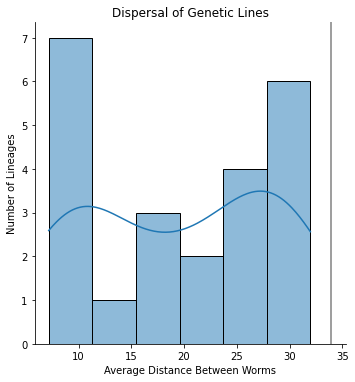

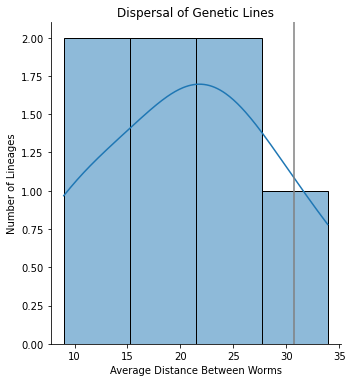

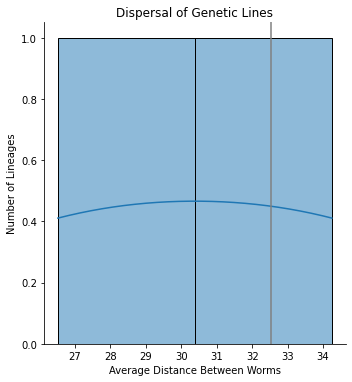

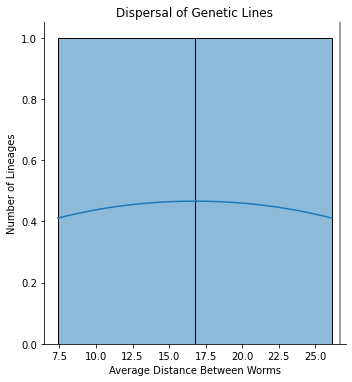

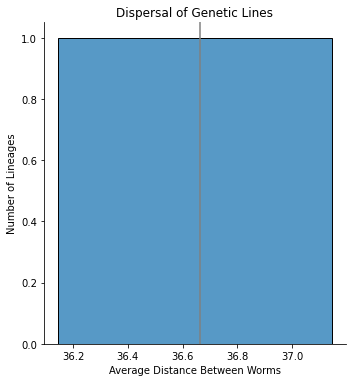

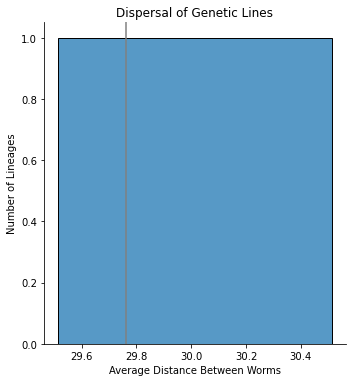

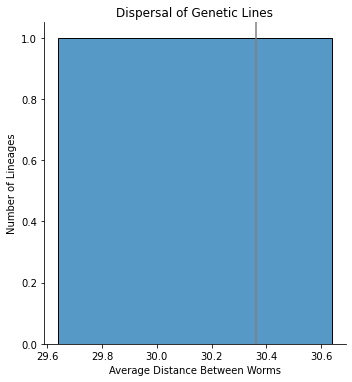

In [28]:
for i in range(1,len(time_saved)):
    RG.clump(my_data[i]["par"], my_data[i]["array"], my_data[i]["p_to_i"])

clumpiness of each lineage with more than 1% of living worms vs. clumpiness of a random sample of the population

In [29]:
RG.winner(time_saved, my_data)

    Time (hrs)  Winning Line  Avg Dauer Gene  Std Dev  Frac of Pop
0            1             0          16.780    0.000        0.005
1          250            73          21.288    3.505        0.014
2          500           101          27.143    0.011        0.030
3         1000            96          33.136    0.238        0.194
4         1500            79          18.468    0.953        0.112
5         2000            28          33.155    0.291        0.107
6         5000            60          31.079    0.446        0.410
7        10000           126          15.905    0.024        0.786
8        15000           126          15.885    0.112        0.984
9        20000           126          15.912    0.034        1.000
10       25000           126          15.911    0.010        1.000
11       30000           126          15.913    0.055        1.000


"Avg Dauer Gene" and "Std Dev" are only measuring the genetics of the winning line

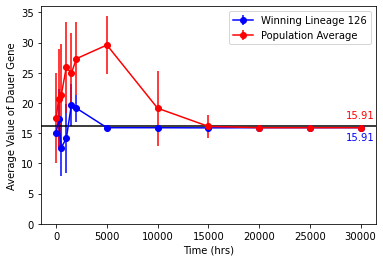

In [30]:
RG.dauer_over_time(my_data[-1]["par"], L2d_avg, time_saved, my_data)

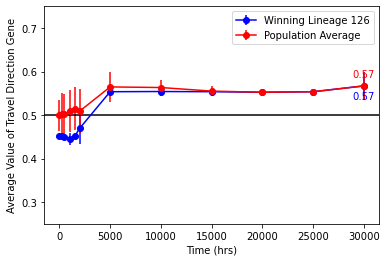

In [31]:
RG.smell_over_time(time_saved, my_data)

y axis limits include travel direction genes from 0.25 - 0.75

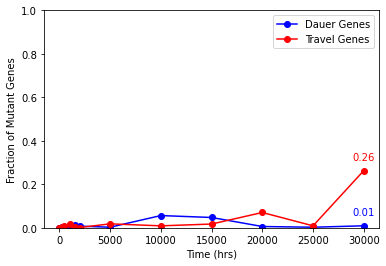

In [32]:
RG.mutation(time_saved, my_data)

- fraction of mutant genes = the number of genes NOT in the original population / the total number of genes
- only look at the genes of living worms

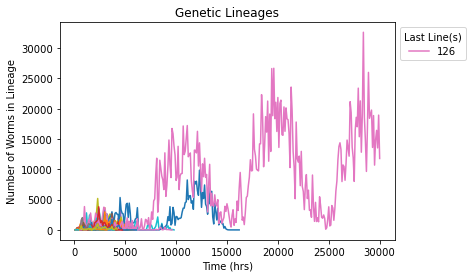

In [33]:
RG.line_track(my_data[-1]["par"])

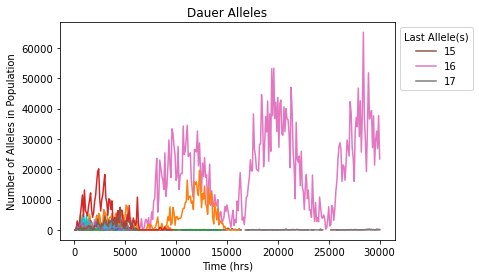

In [34]:
RG.allele_track(my_data[-1]["par"])

- allele values are rounded to the nearest whole number so they can be sufficiently grouped
- all negative allele values will be changed to zero

In [35]:
pop_size = my_data[-1]["par"]["pop_size"]
RG.make_muller(pop_size)

use this function in combination with the R code written below

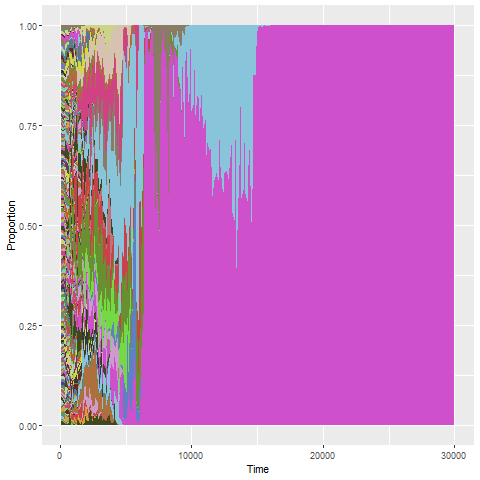

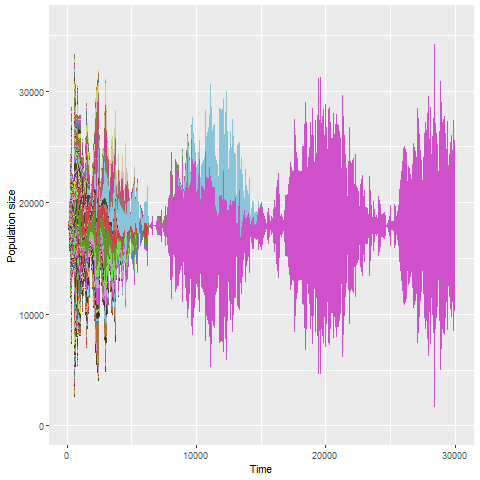

In [36]:
%%R -i pop_size

# set the working directory
setwd("C:/Users/Rachel/Documents/Rachel/BS MS Program/muller_plots/")

# load required packages
suppressMessages(library("ggmuller"))
suppressMessages(library("readr"))
suppressMessages(library("plyr"))
suppressMessages(library("dplyr"))
suppressMessages(library("magrittr"))
suppressMessages(library("ggplot2"))
suppressMessages(library("tidyr"))

# read in the data and define starting values
pop_data = read_csv("lineage_data.csv", col_types=cols())
start_time = min(pop_data$Time)
start_pop_size = pop_data %>% filter(Time == start_time) %>% pull(Population) %>% sum(.)

# make the edges matrix and add the universal parent
edges = tibble(Parent=pop_size, Identity=unique(pop_data$Identity))
pop_data = rbind.fill(tibble(Time=start_time-0.01, Identity=pop_size, Population=start_pop_size), pop_data)

# create the muller matrix
muller_matrix = get_Muller_df(edges, pop_data)

# create and print the plots
mp = Muller_plot(muller_matrix, add_legend = F, xlab = "Time", ylab = "Proportion")
mpp = Muller_pop_plot(muller_matrix, add_legend = F, xlab = "Time", ylab = "Population size")
print(mp)
print(mpp)

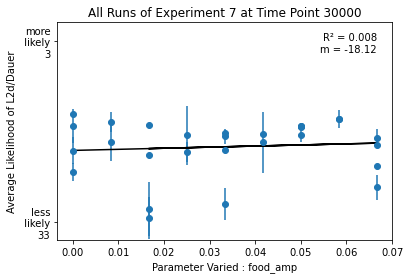

In [37]:
if combination_graph:
    RG.combine_results(exp, para, time_saved[-1])

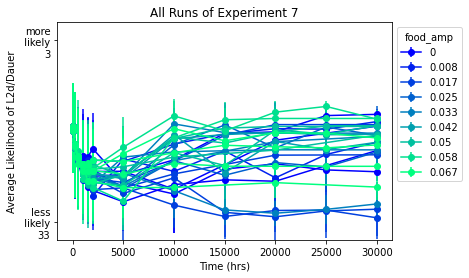

In [38]:
if combination_graph:
    RG.combine_results_over_time(exp, para)

In [39]:
winsound.Beep(1800,500)